<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Pablo Alejandro Rivera Sánchez y Miriam Eunice Rosas Medellín.

**Fecha:** 22 de febrero del 2021.

**Expediente** : 721005 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase 7
**Link al repositorio en Github**: https://github.com/pabloriverasnz/Tarea4_PRivera_MRosas

## Ejercicio 1

Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n = 5, p = 0.5` y `n = 5, p = 0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

### Solución de Pablo

#### Código

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st

In [2]:
def juegos():
    dado_nc = np.random.randint(1, 7, 1)
    dado_c1 = st.binom(n = 5, p = 0.5, loc = 1).rvs(size = 1)
    dado_c2 = st.binom(n = 5, p = 0.2, loc = 1).rvs(size = 1)
    suma = dado_nc + dado_c1 + dado_c2
    if suma == 7:
        return 1
    elif suma == 14:
        return 1
    elif suma == 18:
        return 1
    else:
        return 0   

In [3]:
Nj = 100000
prob71418 = sum([juegos() for i in range(Nj)]) / Nj
prob71418

0.14008

In [4]:
N = 100000
dado_c1 = st.binom(n = 5, p = 0.5, loc = 1).rvs(size = N)
dado_c2 = st.binom(n = 5, p = 0.2, loc = 1).rvs(size = N)
dado_nc = np.random.randint(1, 7, N)
sm = dado_c1 + dado_c2 + dado_nc
sr7 = sum(list(map(lambda x: 1 if x == 7 else 0, sm))) / N
sr14 = sum(list(map(lambda x: 1 if x == 14 else 0, sm))) / N
sr18 = sum(list(map(lambda x: 1 if x == 18 else 0, sm))) / N

sr7, sr14, sr18

(0.12675, 0.01339, 0.0)

In [5]:
print('La probabilidad de lanzar estos 3 dados y sacar 7, 14 o 18 (juntos) es de: ', prob71418)
print('La probabilidad de lanzar estos 3 dados y sacar 7 es de: ', sr7)
print('La probabilidad de lanzar estos 3 dados y sacar 14 es de: ', sr14)
print('La probabilidad de lanzar estos 3 dados y sacar 18 es de: ', sr18)

La probabilidad de lanzar estos 3 dados y sacar 7, 14 o 18 (juntos) es de:  0.14008
La probabilidad de lanzar estos 3 dados y sacar 7 es de:  0.12675
La probabilidad de lanzar estos 3 dados y sacar 14 es de:  0.01339
La probabilidad de lanzar estos 3 dados y sacar 18 es de:  0.0


#### Markdown

Calculé dos probabilidades diferentes ya que no entendí bien cuál pedía el ejercicio. La primera es la probabilidad de que, al lanzar los 3 dados como especifica el problema, se obtenga entre los 3 ya sea un 7, un 14 o un 18. Esto se hizo en una función que simula el juego en el que, si la suma de los 3 dados da algunos de los números nos devuelve 1, al simular el juego varias veces podemos obtener la probabilidad. El segundo de set de probabilidades es la probabilidad individual de obtener cada número (7, 14 y 18), esta se calcula simulando 100000 veces los dados y dentro de la suma encontrar cuántas veces salió el número deseado.

Probabilidades:
- De 7, 14 o 18: $14\%$
- De 7: $12.68\%$
- De 14: $1.34\%$
- De 18: $0\%$

### Solución de Miriam

#### Código

In [6]:
import numpy as np
import scipy.stats as st
np.random.seed(123)
dado1 = np.random.randint(1, 7, 100000)
dado2 = st.binom(n = 5, p = 0.5, loc = 1).rvs(size = 100000)
dado3 = st.binom(n = 5, p = 0.2, loc = 1).rvs(size = 100000)
suma = dado1 + dado2 + dado3 # arreglo de las sumas de 100,000 (cien mil) tiradas
proba7 = len(suma[suma == 7]) / len(suma)
proba14 = len(suma[suma == 14]) / len(suma)
proba18 = len(suma[suma== 18]) / len(suma)
print("La probabilidad de que la suma sea 7 es " + str(proba7) + ".")
print("La probabilidad de que la suma sea 14 es " + str(proba14) + ".")
print("La probabilidad de que la suma sea 18 es " + str(proba18) + ".")

La probabilidad de que la suma sea 7 es 0.12712.
La probabilidad de que la suma sea 14 es 0.01359.
La probabilidad de que la suma sea 18 es 0.0.


#### Markdown

Si se utiliza la semilla 123 para generar los resultados aleatorios de los dados (el primero con distribución uniforme y los siguientes con distribución binomial), y se tiran 100,000 veces, la probabilidad de las sumas son las siguientes:
1. La probabilidad de que la suma sea 7 es $12.71\%$.
2. La probabilidad de que la suma sea 14 es $1.36\%$.
3. La probabilidad de que la suma sea 18 es $0\%$.

## Ejercicio 2

##### Ejercicio de aplicación - Cafetería Central

Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

##### Objetivo
Realizar una simulación estimando el tiempo medio que se tardarán los clientes en ser atendidos entre el horario de 6:30 am a 1:30 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

##### Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Todas las distrubuciones de probabilidad se supondrán uniformes.
- Tiempo de simulación: 6:30 am - 1:30 pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min = 5 seg., Max = 30 seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min. = 60 seg., Max = 5 min. = 300 seg.
    - Hombre: Min = 40 seg. , Max = 2 min. = 120 seg.
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos

Responder las siguientes preguntas basados en los datos del problema:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
3. ¿Cuál fue el número de personas atendidas por día?
4. ¿Cuál fue el tiempo de atención promedio?
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

In [2]:
# Datos del problema
d = 5
T = 25200
T_at_min = 5; T_at_max = 30
T_mujer_min = 60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80

### Solución de Pablo

#### Código

In [3]:
# Generamos variables aleatorias uniformes entre 1 y 0, 1000 clientes por 5 días.
N_clientes = 1000
clientesx = st.uniform(loc = 0, scale = 1).rvs(size = [N_clientes , d])

In [4]:
# Convertimos las variables entre 1 y 0 a ceros y unos para diferenciar el sexo de la persona.
clientes_t = [[1 if clientesx[i,j] < 0.5 else 0 for j in range(clientesx.shape[1])] for i in range(len(clientesx))]

# Esta variable simplemente contiene el total de clientes por los 5 días
clientes_totales = [[1 if clientesx[i,j] < 0.5 else 1 for j in range(clientesx.shape[1])] for i in range(len(clientesx))]

In [5]:
# Calculamos el tiempo de llegada hasta ser atendido con su distribución para el número de clientes y los días.
t_llegada = st.uniform(loc = T_at_min, scale = T_at_max - T_at_min).rvs(size = [N_clientes, d])

# Multiplicamos los clientes totales por el tiempo de llegada
# Independientemente de si la persona es hombre o mujer, habrá un tiempo de espera para cada cliente.
t1 = clientes_totales * t_llegada

In [6]:
# Generamos la variable aleatoria del tiempo en el que las mujeres serán atendidas.
t_atend_m = st.uniform(loc = T_mujer_min, scale = T_mujer_max - T_mujer_min).rvs(size = [N_clientes, d])

In [7]:
# Multiplicamos la lista de clientes, que identifica a las mujeres con el número 1
# con el tiempo en que se tardaron en atender a las mujeres
# esto genera una nueva variable en donde solo toman valores las mujeres (1)
t_atend_m_c = clientes_t * t_atend_m

In [8]:
# Sumamos la variable anterior con el tiempo que habíamos calculado para cada cliente
# es decir, agregaremos el tiempo que se tardarón en atender solo a las mujeres al tiempo inicial
# el tiempo de los hombre se queda igual por ahora.
t2 = t_atend_m_c + t1

In [9]:
# Generamos la variable aleatoria del tiempo en el que los hombres serán atendidos.
t_atend_h = st.uniform(loc = T_hombre_min, scale = T_hombre_max - T_hombre_min).rvs(size = [N_clientes, d])

# Revertimos la variable de 0 y 1 de cliente para que se identifique como 1 a los hombres.
clientes_t_inv = [[0 if clientesx[i,j] < 0.5 else 1 for j in range(clientesx.shape[1])] for i in range(len(clientesx))]

In [10]:
# Multiplicamos dicha variable el tiempo en atender a los hombres y nos da
# como resultado los tiempos que se tardaron en atender únicamente cuando eran hombre.
t_atend_h_c = clientes_t_inv * t_atend_h


In [11]:
# Sumamos la variable anterior para ahora obtener el tiempo total en que atendieron a los hombres
# es decir, el tiempo inicial para cada personas más el tiempo individual de los hombres.

# En esta variable tenemos los tiempos (en segundos) que tardaron en atender a todas las personas indivudales, 
# incluyen el inicial y el tiempo si es hombre o mujer.
t3 = t_atend_h_c + t2
t3

array([[ 53.2269179 ,  53.10302681, 228.51466053, 126.1237071 ,
        122.42381445],
       [127.01617408,  80.0725183 ,  76.11966902, 209.28791413,
         58.83166083],
       [104.06976702, 125.01591181, 318.82013927,  75.55967101,
         98.69131802],
       ...,
       [116.64324924, 117.09338254,  83.44069084, 214.11281521,
        124.92920644],
       [ 95.62969856,  85.73205017, 248.85859074, 189.86518279,
        204.26429759],
       [248.57503038, 262.93657025, 118.34671854,  62.64774438,
         86.12739312]])

In [12]:
# Como tenemos segundos limitados por día, agregamos una condición en la que cada lista
# se detenga cuando se llegue al límite de segundos por día (columna)
tt = [[i for i in t3[:,j].cumsum() if i < T] for j in range(clientesx.shape[1])]

# Estas son el número de personas atendidas cada día. 
personas_atendidas = [len(tt[i]) for i in range(len(tt))]
print('El número de personas atendidas por día fue: ', personas_atendidas, 'personas.')

El número de personas atendidas por día fue:  [178, 156, 170, 173, 167] personas.


In [13]:
def selec_hasta_max(variable: 'Variable sobre la cual se tomará hasta el máximo número de clientes atendidos'):
    '''
    Esta función nos devuelve una lista de valores 
    para cada día (columna) hasta el número máximo de personas atendidas
    de la variable que elegiamos (array),
    los número máximos se encuentran en la variable 'personas_atendidas'
    '''
    x = [variable[0:personas_atendidas[i],i] for i in range(clientesx.shape[1])]
    return x

In [14]:
# Seleccionamos los tiempos de cada cliente (total ya con el inicial y sabiendo su sexo)
# hasta el valor en el que se supera el máximo de segundos, en otras palabras
# hasta el número máximo de personas atendidas.
ti_personas_atendidas = selec_hasta_max(t3)

In [15]:
# Promedio de tiempo de atención por cliente por día.
t_prom = [round(ti_personas_atendidas[i].mean(), 4) for i in range(clientesx.shape[1])]
t_prom_tt = sum(t_prom) / len(t_prom)
print('El tiempo de atención promedio por día fue de: ', t_prom, 
      'segundos, mientras que el promedio de los 5 días fue de: ', round(t_prom_tt, 4), 'segundos.')

El tiempo de atención promedio por día fue de:  [141.0096, 160.75, 147.6574, 145.0058, 150.8365] segundos, mientras que el promedio de los 5 días fue de:  149.0519 segundos.


In [16]:
# Creamos la variable aleatoria para el consumo (en dinero) de las mujeres cada día.
consumo_m = st.uniform(loc = C_mujer_min, scale = C_mujer_max - C_mujer_min).rvs(size = [N_clientes, d])

In [17]:
# Multiplicamos dicho consumo con los clientes que son mujeres (identificadas con un 1)
consumo_m_t = clientes_t * consumo_m

# Seleccionamos los datos hasta el máximo número de clientes atendidos por día para las mujeres.
consumo_m_tt = selec_hasta_max(consumo_m_t)

In [18]:
# Creamos la variable aleatoria para el consumo (en dinero) de los hombres cada día.
consumo_h = st.uniform(loc = C_hombre_min, scale = C_hombre_max - C_hombre_min).rvs(size = [N_clientes, d])

In [19]:
# Multiplicamos dicho consumo con los clientes que son mayores (identificadas con un 1) en la clientes inversa.
consumo_h_t = clientes_t_inv * consumo_h

# Seleccionamos los datos hasta el máximo número de clientes atendidos por día para los hombres.
consumo_h_tt = selec_hasta_max(consumo_h_t)

In [20]:
# Sumamos los consumos de ambos sexos para obtener el gasto individual de cada cliente por día.
# Como las variables anteriores ya contemplaban los clientes máximos, esta siguiente es la completa.
consumo_mh_tt = [consumo_h_tt[i] + consumo_m_tt[i] for i in range(clientesx.shape[1])]
consumo_mh_tt

[array([37.82774048, 41.40339593, 66.91597433, 70.95083225, 40.23601973,
        97.59981867, 23.9937398 , 56.87163244, 82.22915619, 33.61299268,
        81.17588211, 39.69775587, 31.52552134, 50.72434112, 47.05500453,
        61.85708656, 77.85407004, 66.05475067, 50.84714982, 82.41048274,
        64.40340011, 55.02601494, 53.62694023, 56.62251306, 40.46715134,
        46.11745517, 33.92891968, 20.01523418, 36.12747742, 70.89111857,
        52.26057148, 79.42102573, 78.06607881, 47.1845454 , 26.15242973,
        90.5308906 , 62.91271906, 46.71559404, 97.57181996, 70.5010655 ,
        40.4227019 , 89.76295182, 20.50642442, 62.16336768, 42.91533524,
        58.20730859, 66.9021507 , 61.55857742, 99.94529945, 64.34043045,
        47.39752203, 43.10853199, 55.45232391, 48.28237178, 64.98612215,
        96.47920534, 84.04785995, 53.07043223, 63.3783027 , 64.94402442,
        73.31592826, 76.74185668, 63.97296766, 22.21356333, 45.14575693,
        71.35969781, 82.29379873, 20.72539834, 65.8

In [21]:
# Sumamos el consumo de cada día para obtener la ganancia diaria del café.
ganancia_cafe = [round(sum(consumo_mh_tt[i]), 4) for i in range(clientesx.shape[1])]

# Ganancia total, ganancia promedio por día y rentabilidad del café
ganancia_t_cafe = round(sum(ganancia_cafe), 4)
ganancia_p_cafe = round(sum(ganancia_cafe) / len(ganancia_cafe), 4)
rent_cafe = round(((sum(ganancia_cafe) / len(ganancia_cafe)) * 0.6), 4)

print('La ganancia promedio de la cafetería en 5 días fue de: ', ganancia_p_cafe,
     'pesos, con una rentabilidad de: ', rent_cafe, 'pesos.')

La ganancia promedio de la cafetería en 5 días fue de:  9806.2542 pesos, con una rentabilidad de:  5883.7525 pesos.


In [22]:
# Seleccionamos únicamente el consumo de las mujeres
total_consumo_m = [consumo_m_tt[i][consumo_m_tt[i]!=0] for i in range(clientesx.shape[1])]

# Seleccionamos únicamente el consumo por día de los hombres.
total_consumo_h = [consumo_h_tt[i][consumo_h_tt[i]!=0] for i in range(clientesx.shape[1])]

In [23]:
# Sumamos el consumo de cada cliente mujer por día, la suma de esto nos dará el total del consumo. 
gastos_m = [round(sum(total_consumo_m[i]), 4) for i in range(clientesx.shape[1])]

gastos_t_m = sum(gastos_m)
print('Los gastos totales de las mujeres en los 5 días fue de: ', gastos_t_m, 'pesos.')

Los gastos totales de las mujeres en los 5 días fue de:  27507.9982 pesos.


In [24]:
# Sumamos el consumo de cada cliente hombre por día, la suma de esto nos dará el total del consumo. 
gastos_h = [round(sum(total_consumo_h[i]), 4) for i in range(clientesx.shape[1])]

gastos_t_h = sum(gastos_h)
print('Los gastos totales de los hombres en los 5 días fue de: ', gastos_t_h, 'pesos.')

Los gastos totales de los hombres en los 5 días fue de:  21523.2729 pesos.


In [25]:
# De las variables anteriores también podemos obtener el consumo medio por mujeres por día.
prom_gastos_m = [round(total_consumo_m[i].mean(), 4) for i in range(clientesx.shape[1])]

prom_gastos_t_m = round(sum(prom_gastos_m) / len(prom_gastos_m), 4)
print('El consumo promedio de las mujeres fue de: ', prom_gastos_t_m, 'pesos.')

El consumo promedio de las mujeres fue de:  64.2778 pesos.


In [26]:
# Y el consumo medio por hombres por día. 
prom_gastos_h = [round(total_consumo_h[i].mean(), 4) for i in range(clientesx.shape[1])]

prom_gastos_t_h = round(sum(prom_gastos_h) / len(prom_gastos_h), 4)
print('El consumo promedio de los hombres fue de: ', prom_gastos_t_h, 'pesos.')

El consumo promedio de los hombres fue de:  51.6193 pesos.


In [27]:
# Los prints están en el código conforme se resolvía la pregunta pero también estarán aquí a manera de resumen.
print('Los gastos totales de las mujeres en los 5 días fue de: ', gastos_t_m, 'pesos.')
print('Los gastos totales de los hombres en los 5 días fue de: ', gastos_t_h, 'pesos.')
print('El consumo promedio de las mujeres fue de: ', prom_gastos_t_m, 'pesos.')
print('El consumo promedio de los hombres fue de: ', prom_gastos_t_h, 'pesos.')
print('El número de personas atendidas por día fue: ', personas_atendidas, 'personas.')
print('El tiempo de atención promedio por día fue de: ', t_prom, 
      'segundos, mientras que el promedio de los 5 días fue de: ', round(t_prom_tt, 4), 'segundos.')
print('La ganancia promedio de la cafetería en 5 días fue de: ', ganancia_p_cafe,
     'pesos, con una rentabilidad de: ', rent_cafe, 'pesos.')

Los gastos totales de las mujeres en los 5 días fue de:  27507.9982 pesos.
Los gastos totales de los hombres en los 5 días fue de:  21523.2729 pesos.
El consumo promedio de las mujeres fue de:  64.2778 pesos.
El consumo promedio de los hombres fue de:  51.6193 pesos.
El número de personas atendidas por día fue:  [178, 156, 170, 173, 167] personas.
El tiempo de atención promedio por día fue de:  [141.0096, 160.75, 147.6574, 145.0058, 150.8365] segundos, mientras que el promedio de los 5 días fue de:  149.0519 segundos.
La ganancia promedio de la cafetería en 5 días fue de:  9806.2542 pesos, con una rentabilidad de:  5883.7525 pesos.


#### Markdown

El problema de simulación se solucionó de la siguiente manera:

- Se generó un array de números uniformes entre 0 y 1, cada número representaba un cliente y cada columna de la misma el día. Se convirtieron estos números aleatorios a unos y ceros para identificar el sexo del cliente.
- Posteriormente teníamos que simular el tiempo de atención dependiendo de varias condiciones y la restricción de que no se podía pasar de cierto valor. 
- Primero calculamos el tiempo desde que el cliente llega hasta ser atendido, todos los clientes pasan por esta situación. Después calculamos el tiempo en el que las mujeres eran atendidas de acuerdo a una variable con cierta distribución, de igual manera, calculamos el tiempo en el que los hombres eran atendidos, esto con ayuda la primer variable que identificaba a los clientes por sexo. 
- Segundo, sumamos todos estos tiempos y los juntamos en una sola variable en donde cada tiempo representaba un cliente y de igual manera cada columna representaba un día. 
- Sobre estos tiempos, considerando todas las condiciones, aplicamos la restricción de tiempo para encontrar  hasta que cliente se iba a atender por día y por lo tanto teníamos **cuantos clientes se atendían por día**.
- Gracias a esto pudimos reducir nuestra variable de tiempos hasta el número de clientes que en realidad se atendía y en base a esta información se calculó el **promedio de atención** por día y por los 5 días. 
- Posteriormente modelamos el consumo de hombres y mujeres y nuevamente, de acuerdo al sexo del cliente, se agregaba la cantidad consumida por cliente por día. De igual manera, calculamos únicamente sobre el número de clientes que se alcanzaba a atender por día.
- De la información anterior se obtuvo la **ganancia promedio y la rentabilidad de la cafetería**, así como los **gastos totales en los 5 días** y el **gasto promedio** de ambos sexos.

Estos fueron los resultados finales de la simulación:

1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?

El gasto de las mujeres en los 5 días de trabajo fue de $\$27507.9982$. <br>
El gasto de los hombres en los 5 días de trabajo fue de $\$21523.2729$.

2. ¿Cuál fue el consumo promedio de los hombres y mujeres?

El consumo promedio de las mujeres fue de $\$64.2778$. <br>
El consumo promedio de los hombres fue de $\$51.6193 pesos$.

3. ¿Cuál fue el número de personas atendidas por día?

El número de personas atendidas por día fue $178$, $156$, $170$, $173$, $167$ respectivamente. 

4. ¿Cuál fue el tiempo de atención promedio?

El tiempo de atención promedio fue de $149.0519$ segundos.

5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

La ganancia promedio de la cafetería en los 5 días fue de $\$9806.2542$ con una rentabilidad de $\$5883.7525$

### Solución de Miriam

#### Código

In [33]:
np.random.seed(123) # semilla
escenarios = 1000 # escenarios (en este caso, un escenario será una persona)
aleatorios = [np.random.random(escenarios) for i in range(d)] # generar números aleatorios
personas_d_dias = [np.array([0 if aleatorios[i][n] >= 0.5 else 1 for n in range(escenarios)]) for i in range(d)]
                   # aplicar la condición hombre - mujer, 1000 personas por día (default)
C_mujer = st.uniform(loc = C_mujer_min, scale = C_mujer_max - C_mujer_min).rvs(size = [escenarios, d], random_state = 123)
          # distribución uniforme del consumo de las mujeres
C_hombre = st.uniform(loc = C_hombre_min, scale = C_hombre_max - C_hombre_min).rvs(size = [escenarios, d], random_state = 123)
           # distribución uniforme del consumo de los hombres
T_at_mujer_min = T_at_min + T_mujer_min # tiempo mínimo total en el que se atiende a una mujer
T_at_mujer_max = T_at_max + T_mujer_max # tiempo máximo total en el que se atiende a una mujer
T_at_hombre_min = T_at_min + T_hombre_min # tiempo mínimo total en el que se atiende a un hombre
T_at_hombre_max = T_at_max + T_hombre_max # tiempo máximo total en el que se atiende a un hombre
T_mujer = st.uniform(loc = T_at_mujer_min, scale = T_at_mujer_max - T_at_mujer_min).rvs(size = [escenarios, d], 
          random_state = 123) # distribución uniforme del tiempo en el cual se atiende a una mujer
T_hombre = st.uniform(loc = T_at_hombre_min, scale = T_at_hombre_max - T_at_hombre_min).rvs(size = [escenarios, d],
           random_state = 123) # distribución unidorme del tiempo en el cual se atiende a un hombre
tiempos = [[T_hombre.T[i][n] if personas_d_dias[i][n] == 0 else T_mujer.T[i][n] for n in range(escenarios)] for i in range(d)]
          # tiempo en el cual cada una de las 1000 personas es atendida conforme llega, para los 5 días
binary_personas = [["person" if np.array(tiempos)[i].cumsum()[n] <= T else None for i in range(d)] for n in range(escenarios)]
                  # se agrega "person" si dicha persona alcanza a ser atendida dentro del límite de tiempo

In [34]:
num_personas = [list(np.array(binary_personas).T[i]).count("person") for i in range(d)]
print("La cantidad de personas atendidas (hombre o mujer) en cada uno de los días son las siguientes", num_personas)
dia1 = personas_d_dias[0][:num_personas[0]] # personas atendidas en el día 1 (con 0s y 1s), ya tomando en cuenta el tiempo
dia2 = personas_d_dias[1][:num_personas[1]] # personas atendidas en el día 2 (con 0s y 1s), ya tomando en cuenta el tiempo
dia3 = personas_d_dias[2][:num_personas[2]] # personas atendidas en el día 3 (con 0s y 1s), ya tomando en cuenta el tiempo
dia4 = personas_d_dias[3][:num_personas[3]] # personas atendidas en el día 4 (con 0s y 1s), ya tomando en cuenta el tiempo
dia5 = personas_d_dias[4][:num_personas[4]] # personas atendidas en el día 5 (con 0s y 1s), ya tomando en cuenta el tiempo
dias = [dia1, dia2, dia3, dia4, dia5] # lista de litas de las personas atendidas por día
tiempos2 = [[T_hombre.T[i][n] if dias[i][n] == 0 else T_mujer.T[i][n] for n in range(num_personas[i])] for i in range(d)]
           # tiempo en el cual cada una de las personas es atendida conforme llega (ya tomando en cuenta cuales alcanzan)
tiempo_prom = np.array(list(map(lambda x: np.array(x).mean(), tiempos2))).mean()
              # primero calculo el promedio por día, y luego saco el promedio de todos los días
print("El tiempo de atención promedio (tanto para hombres como mujeres) de los 5 días fue de " + str(tiempo_prom) + 
      " seg. por persona.")

La cantidad de personas atendidas (hombre o mujer) en cada uno de los días son las siguientes [178, 169, 164, 160, 176]
El tiempo de atención promedio (tanto para hombres como mujeres) de los 5 días fue de 148.56574803547173 seg. por persona.


In [35]:
consumos = [[C_hombre.T[i][n] if dias[i][n] == 0 else C_mujer.T[i][n] for n in range(num_personas[i])] for i in range(d)]
           # consumo de cada una de las personas que alcanzaron a ser atendidas en cada uno de los 5 días
cons_muj_con_cero = np.array(dias, dtype = object) * np.array(consumos, dtype = object) 
                    # únicamente el consumo de las mujeres para poder sacar el promedio (el de los hombres se muestra como 0)
cons_muj_con_nan = [[cons_muj_con_cero[i][n] if cons_muj_con_cero[i][n] != 0 else np.nan for n in range(num_personas[i])] 
                    for i in range(d)] # convierto el consumo de los hombres a np.nan para ignorarlo al sacar la media
cons_prom_muj = np.array(list(map(lambda x: np.array(x)[~ np.isnan(x)].mean(), cons_muj_con_nan))).mean()
print("El consumo promedio de las mujeres en los 5 días sería de " + str(cons_prom_muj) + " pesos diarios.")
cons_suma_muj = np.array(list(map(lambda x: np.array(x)[~ np.isnan(x)].sum(), cons_muj_con_nan))).sum()
                # lo que sería equivalente a todos los ingresos que vienen de las mujeres
print("El consumo total acumulado de todas las mujeres en los 5 días sería de " + str(cons_suma_muj) + " pesos.")
dias_al_reves = [np.array([0 if dias[i][n] == 1 else 1 for n in range(num_personas[i])]) for i in range(d)]
              # switchear las mujeres por los hombres para poder ponerle "1" a los hombres y multiplicar correctamente
cons_hom_con_cero = np.array(dias_al_reves, dtype = object) * np.array(consumos, dtype = object) 
                    # únicamente el consumo de los hombres para poder sacar el promedio (el de las mujeres se muestra como 0)
cons_hom_con_nan = [[cons_hom_con_cero[i][n] if cons_hom_con_cero[i][n] != 0 else np.nan for n in range(num_personas[i])] 
                    for i in range(d)] # convierto el consumo de las mujeres a np.nan para ignorarlo al sacar la media
cons_prom_hom = np.array(list(map(lambda x: np.array(x)[~ np.isnan(x)].mean(), cons_hom_con_nan))).mean()
print("El consumo promedio de los hombres en los 5 días sería de " + str(cons_prom_hom) + " pesos diarios.")
cons_suma_hom = np.array(list(map(lambda x: np.array(x)[~ np.isnan(x)].sum(), cons_hom_con_nan))).sum()
                # lo que sería equivalente a todos los ingresos que vienen de los hombres
print("El consumo total acumulado de todas los hombres en los 5 días sería de " + str(cons_suma_hom) + " pesos.")

El consumo promedio de las mujeres en los 5 días sería de 65.47776471731973 pesos diarios.
El consumo total acumulado de todas las mujeres en los 5 días sería de 27640.883526454185 pesos.
El consumo promedio de los hombres en los 5 días sería de 50.43628365517978 pesos diarios.
El consumo total acumulado de todas los hombres en los 5 días sería de 21312.6771069692 pesos.


In [36]:
ingreso_prom = np.array(list(map(lambda x: np.array(x).sum(), consumos))).mean()
               # primero calculo los ingresos por día, y luego saco el promedio de todos esos ingresos
print("El ingreso promedio de la cafetería en los 5 días sería de " + str(ingreso_prom) + " pesos diarios.")
print("Con una rentabilidad del 60%, la rentabilidad promedio de esos 5 días sería de " + str(ingreso_prom * 0.6) + 
      " pesos diarios.")

El ingreso promedio de la cafetería en los 5 días sería de 9790.712126684677 pesos diarios.
Con una rentabilidad del 60%, la rentabilidad promedio de esos 5 días sería de 5874.427276010806 pesos diarios.


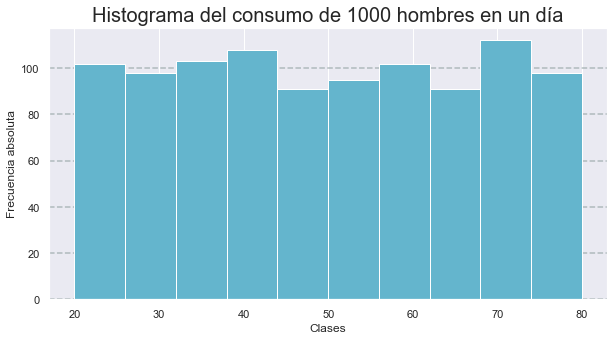

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize = (10, 5))
plt.hist(C_hombre.T[4], bins = (1 + int(np.log2(len(C_hombre.T[4])))), color = "c") # en el día 5
         # regla de Sturges para sacar el número de clases óptimo
plt.xlabel("Clases", fontsize = 12)
plt.ylabel("Frecuencia absoluta", fontsize = 12)
plt.title("Histograma del consumo de 1000 hombres en un día", fontsize = 20)
plt.grid(color = "#95a5a6", linestyle='--', linewidth = 1.5, axis = "y", alpha = 0.7)
plt.show() 
# la gráfica demuestra que sí es una distribución uniforme, se podría hacer 
# con cualquier otra distribución desarrollada en este ejercicio

#### Markdown

Los **pasos** para resolver este ejercicio fueron los siguientes: 
- Primero **se desarrollaron las distribuciones uniformes** correspondientes al consumo de cada uno de los géneros y al tiempo en que estos fueron atendidos. 
- Después, **se creó una fila de $1000$ (escenarios) mujeres y hombres** generada aleatoriamente con las probabilidades proporcionadas (hay $49\%$ de probabilidad de que la persona sea mujer y $51\%$ de que sea hombre). 
- **Cada fila se generó 5 veces**, pues es la fecha futura para la cual se debía de hacer la simulación. 
- Después de eso, **se calculó cuántas personas**, de las que estaban formadas, **alcanzaría a atender la cafetería** antes de cerrar sus puertas. 
- A estas filas reducidas conformadas únicamente de las personas que alcanzarían a ser atendidas, **se les aplicó finalmente la distribución uniforme** dependiendo de si la persona que seguía de atender era hombre y mujer.
- Finalmente, **se hicieron los cálculos** correspondientes dependiendo de si se preguntaba algo relacionado con el consumo o con el tiempo en ser atendidos; y tanto si se trataba de un estadístico por día (ej., el promedio de atención en cada uno de los cinco días, que regresa un array-like), o uno global (ej., el promedio de atención diario para los 5 días, que regresa un integer).

Todas las **preguntas** concretas planteadas en el ejercicio se respondieron con unos `print()` en el código anterior, pero igualmente se responden a continuación:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en $5$ días de trabajo?
```
El consumo total acumulado de todas las mujeres en los 5 días sería de 27640.883526454185 pesos.
```
```
El consumo total acumulado de todas los hombres en los 5 días sería de 21312.6771069692 pesos.
```
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
```
El consumo promedio de las mujeres en los 5 días sería de 65.47776471731973 pesos diarios.
```
```
El consumo promedio de los hombres en los 5 días sería de 50.43628365517978 pesos diarios.
```
3. ¿Cuál fue el número de personas atendidas por día?
```
La cantidad de personas atendidas (hombre o mujer) en cada uno de los días son las siguientes [178, 169, 164, 160, 176]
```
4. ¿Cuál fue el tiempo de atención promedio?
```
El tiempo de atención promedio (tanto para hombres como mujeres) de los 5 días fue de 148.56574803547173 seg. por persona.
```
5. ¿Cuánto fue la ganancia promedio de la cafetería en $5$ días de trabajo y su respectiva rentabilidad?
```
El ingreso promedio de la cafetería en los 5 días sería de 9790.712126684677 pesos diarios.
```
```
Con una rentabilidad del 60%, la rentabilidad promedio de esos 5 días sería de 5874.427276010806 pesos diarios.
```

De manera extra, se realizó un **histograma** del consumo de $1000$ (escenarios) hombres por $5$ días, es decir, $5000$ hombres en total, el cual desmostró que esta distribución uniforme y también presuntamente todas las demás desarrolladas en este ejercicio, en efecto tienen una **distribución uniforme**.
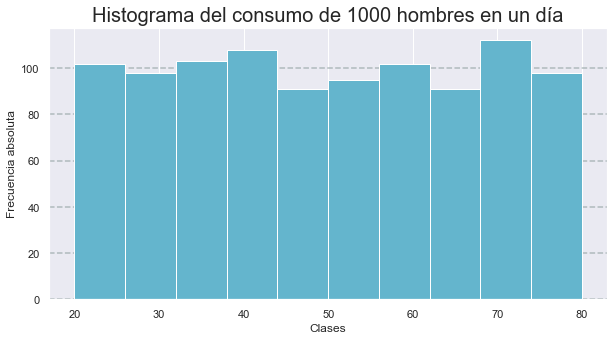